Memuat dataset...

=== Informasi Dataset ===
Jumlah baris: 13566, Jumlah kolom: 9

Kolom dalam dataset:
['country', 'iso3c', 'iso2c', 'year', 'Military expenditure (current USD)', 'Military expenditure (% of general government expenditure)', 'Military expenditure (% of GDP)', 'adminregion', 'incomeLevel']

Tipe data setiap kolom:
country                                                        object
iso3c                                                          object
iso2c                                                          object
year                                                            int64
Military expenditure (current USD)                            float64
Military expenditure (% of general government expenditure)    float64
Military expenditure (% of GDP)                               float64
adminregion                                                    object
incomeLevel                                                    object
dtype: object

Jumlah nilai yang hilan

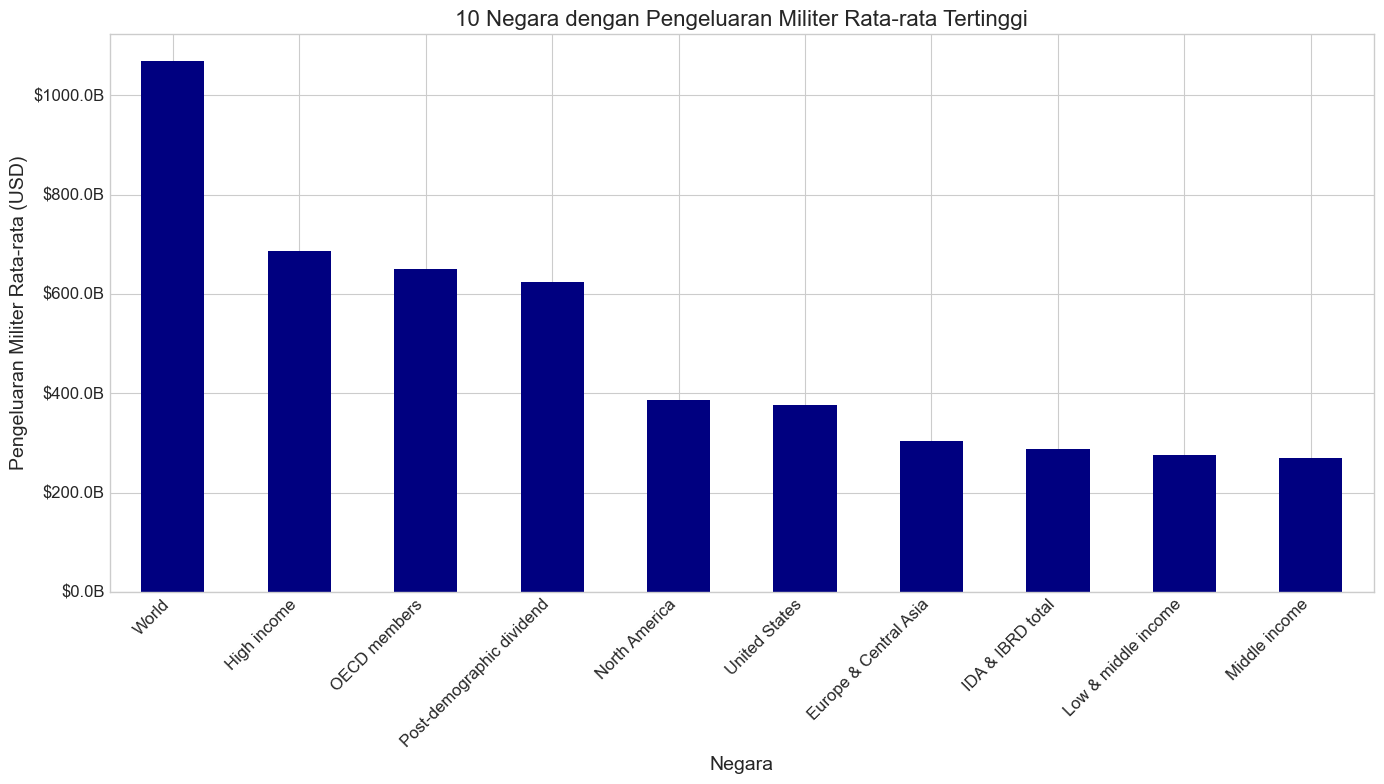


Rentang tahun dalam dataset: 1970 - 2020


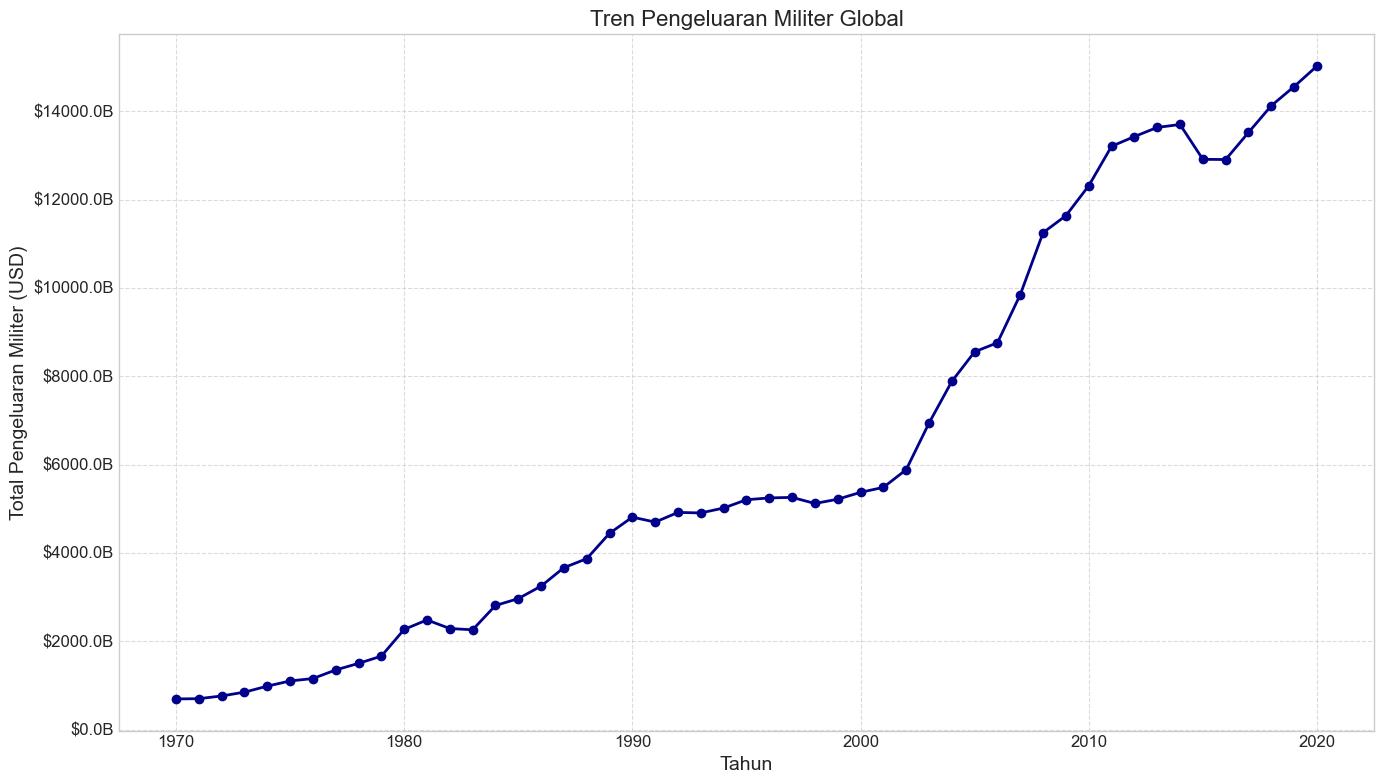

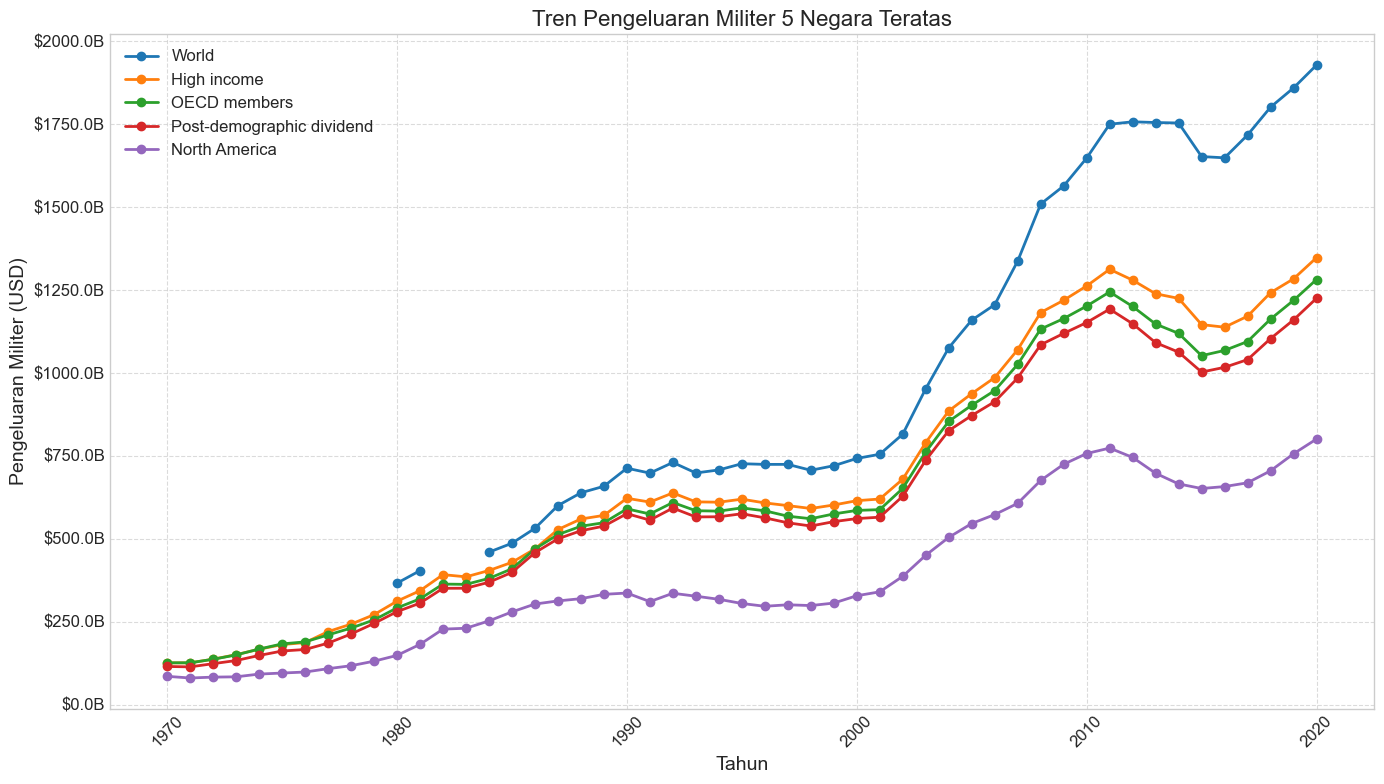

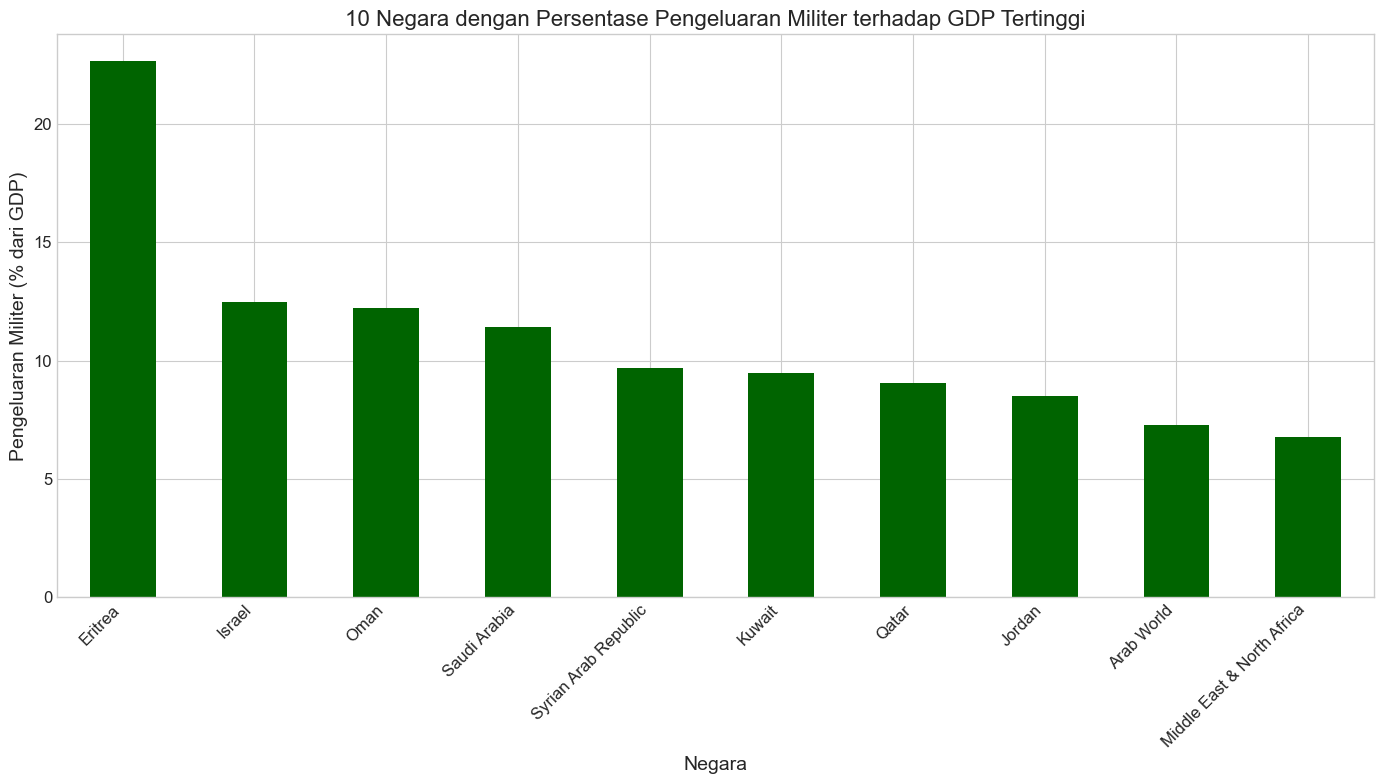

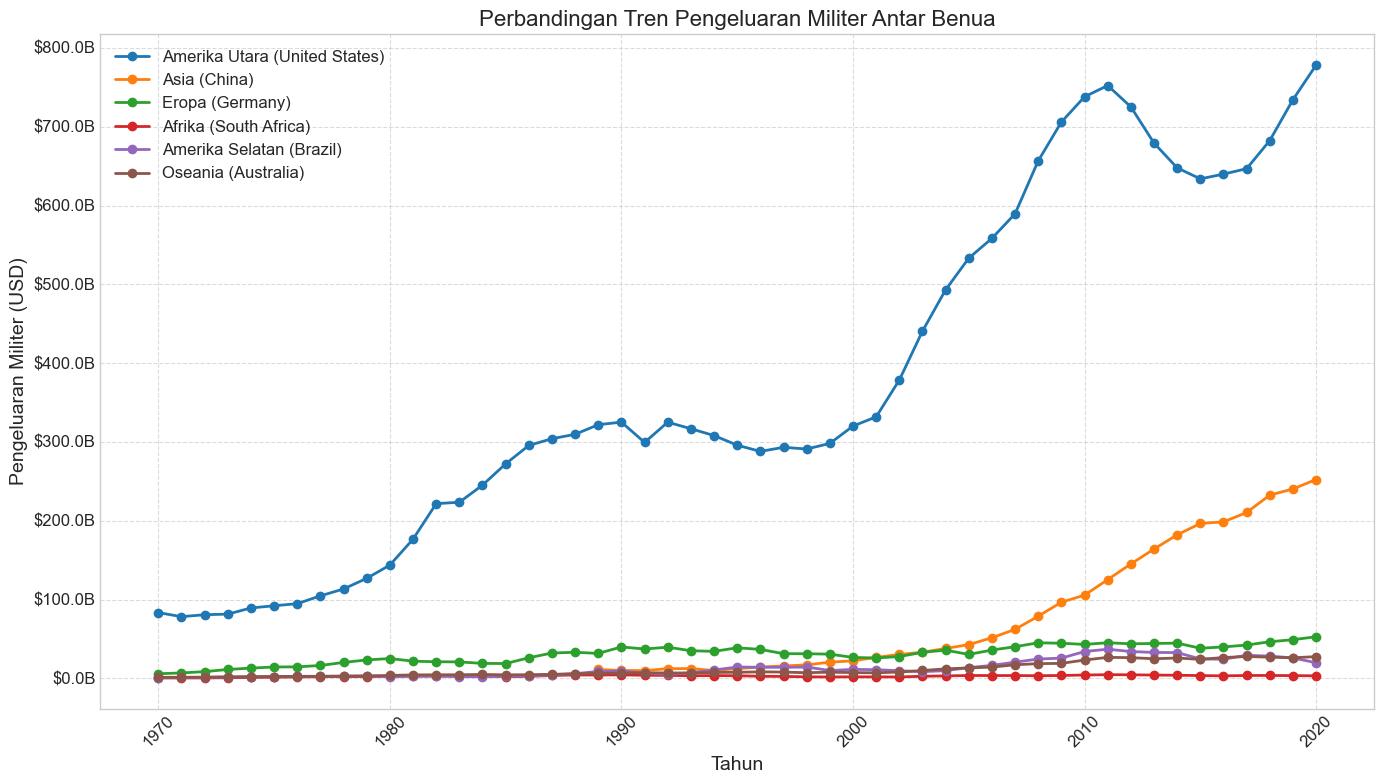


=== Pengujian Model untuk United States ===
Error: [Errno 2] No such file or directory: 'data/military_expenditure.csv'

=== Kesimpulan Exploratory Data Analysis ===

1. Dataset pengeluaran militer ini mencakup berbagai negara di seluruh dunia dengan 
   rentang waktu yang cukup panjang, memungkinkan analisis tren temporal yang baik.

2. Terdapat variasi yang signifikan dalam pengeluaran militer antar negara, dengan 
   Amerika Serikat secara konsisten memiliki pengeluaran tertinggi.

3. Model prediksi yang digunakan (Random Forest, Regresi Linear, Regresi Polinomial) 
   menunjukkan performa yang berbeda-beda bergantung pada karakteristik data negara.

4. Notebook ini dapat digunakan untuk mengeksplorasi negara-negara lain dan menguji 
   kinerja model sebelum menggunakan aplikasi GUI utama.

5. Hasil dari analisis ini menunjukkan bahwa tren pengeluaran militer memiliki pola yang 
   unik untuk setiap negara, sehingga perlu pendekatan yang spesifik untuk setiap kasus.



Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_13012\837063707.py", line 161, in test_models_for_country
    X_train, X_test, y_train, y_test = load_and_prepare_data(country=country_name)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Prediksi tingkat pengeluaran pertahanan - Copy\notebooks\..\src\preprocessing.py", line 8, in load_and_prepare_data
    df = pd.read_csv(csv_path)
         ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\parsers\readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\parsers\readers.py", line 620, in _read
    parser = TextFi

In [ ]:
# Analisis Eksplorasi Data Pengeluaran Militer
# ================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# 1. Import Library
import sys
sys.path.append('..') 
from src.preprocessing import load_and_prepare_data
from src.train_models import train_and_save_models, evaluate_model

# Mengatur tampilan plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 2. Fungsi Utilitas
def format_currency(value):
    """Format nilai besar sebagai mata uang dengan sufiks yang sesuai."""
    if value >= 1_000_000_000:
        return f"${value/1_000_000_000:.2f} Miliar"
    elif value >= 1_000_000:
        return f"${value/1_000_000:.2f} Juta"
    elif value >= 1_000:
        return f"${value/1_000:.2f} Ribu"
    else:
        return f"${value:.2f}"

# 3. Eksplorasi Dataset
# ---------------------
print("Memuat dataset...")
df = pd.read_csv('../data/military_expenditure.csv')

# Informasi umum dataset
print("\n=== Informasi Dataset ===")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")
print("\nKolom dalam dataset:")
print(df.columns.tolist())

# Memeriksa tipe data
print("\nTipe data setiap kolom:")
print(df.dtypes)

# Memeriksa nilai yang hilang
print("\nJumlah nilai yang hilang per kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif kolom numerik:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df[numeric_columns].describe())

# 4. Analisis Data Negara
# -----------------------

# Menghitung jumlah negara dalam dataset
countries = df['country'].unique()
print(f"\nTotal negara dalam dataset: {len(countries)}")

# Top 10 negara dengan jumlah data terbanyak
country_counts = df['country'].value_counts().head(10)
print("\nTop 10 negara dengan jumlah data terbanyak:")
print(country_counts)

# Visualisasi: Top 10 negara dengan pengeluaran militer rata-rata tertinggi
top_spending_countries = df.groupby('country')['Military expenditure (current USD)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
ax = top_spending_countries.plot(kind='bar', color='navy')
plt.title('10 Negara dengan Pengeluaran Militer Rata-rata Tertinggi', fontsize=16)
plt.xlabel('Negara', fontsize=14)
plt.ylabel('Pengeluaran Militer Rata-rata (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Format label sumbu y untuk angka besar
from matplotlib.ticker import FuncFormatter
def billions_formatter(x, pos):
    return f'${x/1e9:.1f}B'
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.tight_layout()
plt.show()

# 5. Analisis Tren Temporal
# -------------------------

# Range tahun dalam dataset
years = sorted(df['year'].unique())
print(f"\nRentang tahun dalam dataset: {min(years)} - {max(years)}")

# Visualisasi: Tren pengeluaran militer global per tahun
global_spending_by_year = df.groupby('year')['Military expenditure (current USD)'].sum()

plt.figure(figsize=(14, 8))
ax = global_spending_by_year.plot(marker='o', linestyle='-', linewidth=2, color='darkblue')
plt.title('Tren Pengeluaran Militer Global', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Total Pengeluaran Militer (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.tight_layout()
plt.show()

# Visualisasi: Tren pengeluaran militer untuk 5 negara teratas
top5_countries = df.groupby('country')['Military expenditure (current USD)'].mean().sort_values(ascending=False).head(5).index

plt.figure(figsize=(14, 8))
for country in top5_countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['Military expenditure (current USD)'], marker='o', linestyle='-', linewidth=2, label=country)

plt.title('Tren Pengeluaran Militer 5 Negara Teratas', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Pengeluaran Militer (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.tight_layout()
plt.show()

# 6. Persentase Pengeluaran Militer terhadap GDP
# ----------------------------------------------

# Visualisasi: Top 10 negara dengan persentase pengeluaran militer terhadap GDP tertinggi
top_gdp_pct = df.groupby('country')['Military expenditure (% of GDP)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
top_gdp_pct.plot(kind='bar', color='darkgreen')
plt.title('10 Negara dengan Persentase Pengeluaran Militer terhadap GDP Tertinggi', fontsize=16)
plt.xlabel('Negara', fontsize=14)
plt.ylabel('Pengeluaran Militer (% dari GDP)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Pengujian Model pada Negara Tertentu
# --------------------------------------

# Fungsi untuk menguji model pada negara tertentu
def test_models_for_country(country_name):
    """
    Menguji model prediksi pada data negara tertentu.
    
    Parameters:
    -----------
    country_name : str
        Nama negara yang akan dianalisis
    """
    print(f"\n=== Pengujian Model untuk {country_name} ===")
    
    try:
        # Persiapkan data
        X_train, X_test, y_train, y_test = load_and_prepare_data(country=country_name)
        print(f"Data berhasil dimuat: {len(X_train)} sampel training, {len(X_test)} sampel testing")
        
        # Latih model
        models = train_and_save_models(X_train, y_train)
        print("Model berhasil dilatih dan disimpan")
        
        # Evaluasi setiap model
        results = {}
        for model_name, model in models.items():
            eval_results = evaluate_model(model, X_test, y_test)
            results[model_name] = {
                'metrics': eval_results,
                'predictions': eval_results['predictions']
            }
        
        # Tampilkan metrik evaluasi
        print("\nMetrik Evaluasi Model:")
        print("-" * 50)
        for model_name, result in results.items():
            metrics = result['metrics']
            r2 = metrics['r2']
            rmse = metrics['rmse']
            
            model_display_name = {
                "random_forest": "Random Forest",
                "linear_regression": "Regresi Linear",
                "polynomial": "Regresi Polinomial"
            }.get(model_name, model_name)
            
            print(f"{model_display_name}:")
            print(f"  - R² Score: {r2:.4f} (semakin mendekati 1 semakin baik)")
            print(f"  - RMSE: {format_currency(rmse)} (semakin kecil semakin baik)")
        
        # Dapatkan tahun dari set pengujian dan urutkan
        years = X_test['year_original'].values
        indices = np.argsort(years)
        years = years[indices]
        y_test = y_test[indices]
        
        # Visualisasi hasil
        plt.figure(figsize=(14, 8))
        
        # Plot nilai aktual
        plt.plot(years, y_test, 'o-', label='Aktual', color='black', linewidth=2)
        
        # Plot nilai prediksi
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        model_names = {
            "random_forest": "Random Forest",
            "linear_regression": "Regresi Linear",
            "polynomial": "Regresi Polinomial"
        }
        
        for i, (model_name, result) in enumerate(results.items()):
            predictions = result['metrics']['predictions'][indices]
            plt.plot(years, predictions, 'o--', 
                    label=model_names.get(model_name, model_name), 
                    color=colors[i % len(colors)], linewidth=1.5, alpha=0.7)
        
        # Tambahkan label dan judul
        plt.xlabel('Tahun', fontsize=14)
        plt.ylabel('Pengeluaran Militer (USD)', fontsize=14)
        plt.title(f'Prediksi Pengeluaran Militer untuk {country_name}', fontsize=16)
        
        # Tambahkan grid dan legenda
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)
        plt.xticks(rotation=45)
        
        # Format sumbu y
        ax = plt.gca()
        ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
        
        plt.tight_layout()
        plt.show()
        
        return results
    
    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# 8. Analisis Perbandingan Multikontinen
# -------------------------------------

# Ambil satu negara dari setiap benua/region untuk perbandingan
continent_representatives = {
    'Amerika Utara': 'United States',
    'Asia': 'China',
    'Eropa': 'Germany',
    'Afrika': 'South Africa',
    'Amerika Selatan': 'Brazil',
    'Oseania': 'Australia'
}

# Visualisasi: Perbandingan tren pengeluaran militer antar benua
plt.figure(figsize=(14, 8))

for continent, country in continent_representatives.items():
    country_data = df[df['country'] == country]
    if not country_data.empty:
        plt.plot(
            country_data['year'], 
            country_data['Military expenditure (current USD)'], 
            marker='o', 
            linestyle='-', 
            linewidth=2, 
            label=f"{continent} ({country})"
        )

plt.title('Perbandingan Tren Pengeluaran Militer Antar Benua', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Pengeluaran Militer (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.tight_layout()
plt.show()

# 9. Demo Pengujian Model
# ----------------------

# Pilih negara untuk demonstrasi
# Ganti dengan negara lain jika ingin menguji model dengan negara berbeda
demo_country = 'United States'
test_models_for_country(demo_country)

# 10. Kesimpulan
# --------------
print("""
=== Kesimpulan Exploratory Data Analysis ===

1. Dataset pengeluaran militer ini mencakup berbagai negara di seluruh dunia dengan 
   rentang waktu yang cukup panjang, memungkinkan analisis tren temporal yang baik.

2. Terdapat variasi yang signifikan dalam pengeluaran militer antar negara, dengan 
   Amerika Serikat secara konsisten memiliki pengeluaran tertinggi.

3. Model prediksi yang digunakan (Random Forest, Regresi Linear, Regresi Polinomial) 
   menunjukkan performa yang berbeda-beda bergantung pada karakteristik data negara.

4. Notebook ini dapat digunakan untuk mengeksplorasi negara-negara lain dan menguji 
   kinerja model sebelum menggunakan aplikasi GUI utama.

5. Hasil dari analisis ini menunjukkan bahwa tren pengeluaran militer memiliki pola yang 
   unik untuk setiap negara, sehingga perlu pendekatan yang spesifik untuk setiap kasus.
""")

# Fungsi untuk eksplorasi lebih lanjut (dapat dijalankan sesuai kebutuhan)
def explore_country(country_name):
    """
    Fungsi untuk mengeksplorasi data satu negara secara detail.
    
    Parameters:
    -----------
    country_name : str
        Nama negara yang akan dianalisis
    """
    country_data = df[df['country'] == country_name]
    
    if country_data.empty:
        print(f"Tidak ada data untuk negara {country_name}")
        return
    
    print(f"\n=== Analisis Detail untuk {country_name} ===")
    print(f"Jumlah data tersedia: {len(country_data)}")
    print(f"Rentang tahun: {country_data['year'].min()} - {country_data['year'].max()}")
    
    # Statistik deskriptif
    print("\nStatistik pengeluaran militer:")
    expenditure_stats = country_data['Military expenditure (current USD)'].describe()
    print(expenditure_stats)
    
    # Cek missing values
    missing = country_data.isnull().sum()
    print("\nNilai yang hilang:")
    print(missing[missing > 0])
    
    # Visualisasi tren pengeluaran
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(
        country_data['year'], 
        country_data['Military expenditure (current USD)'], 
        'o-', 
        color='navy',
        linewidth=2
    )
    plt.title(f'Pengeluaran Militer {country_name}', fontsize=14)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('USD', fontsize=12)
    plt.grid(True, alpha=0.7)
    plt.xticks(rotation=45)
    
    # Visualisasi % dari GDP
    if 'Military expenditure (% of GDP)' in country_data.columns:
        plt.subplot(1, 2, 2)
        plt.plot(
            country_data['year'], 
            country_data['Military expenditure (% of GDP)'], 
            'o-', 
            color='darkgreen',
            linewidth=2
        )
        plt.title(f'Pengeluaran Militer {country_name} (% GDP)', fontsize=14)
        plt.xlabel('Tahun', fontsize=12)
        plt.ylabel('% dari GDP', fontsize=12)
        plt.grid(True, alpha=0.7)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Jalankan model prediction
    print("\nMenjalankan prediksi model untuk negara ini...")
    test_models_for_country(country_name)

# Contoh penggunaan: explore_country("China")